In [1]:
##### LINEAR REGRESSION - MODIFIED (NON-LINEAR) PSEUDOINVERSION ####

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model                    # for verification
from sklearn.svm import SVR                         # for verification
from sklearn.neural_network import MLPRegressor     # for verification
from sklearn.metrics import r2_score

In [2]:
data = np.loadtxt('data.txt')       # shape (50, 2)

x = data[:, 0]      # shape (50,)
y = data[:, 1]      # shape (50,)

plt.figure(1, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(x, y, color='orange', label='original data')
None

In [3]:
### Modified (Non-Linear) Pseudoinversion method

print("Modified (Non-Linear) Pseudoinversion method")

# We'll add some "features", synthetically
x_sin = np.sin(x)
x_squared = (x**2)
features = np.concatenate((x[:, np.newaxis], x_sin[:, np.newaxis], x_squared[:, np.newaxis]), axis=1)

X = np.ones((data.shape[0], 1))
X = np.concatenate((X, features), axis=1)

theta_optimal = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)       # shape (4,)

y_hat = theta_optimal[0] + theta_optimal[1] * x + theta_optimal[2] * x_sin + theta_optimal[3] * x_squared

plt.plot(x, y_hat, color='green', linestyle='', marker='*', label = 'pseudoinv fitted line')

print("theta_optimal:", theta_optimal)      # [2.693 2.406 0.092 0.230]
print("R-squared:", r2_score(y, y_hat))     # 0.99

Modified (Non-Linear) Pseudoinversion method
theta_optimal: [ 2.69302918  2.40616642  0.09156511  0.23050176]
R-squared: 0.992746759432



scikit-learn Linear Regression
intercept, slope: -10.6126259187 [ 6.90359569]
R-squared: 0.963466281851

Support Vector Regression (SVR) using linear and non-linear kernels:

Linear model
intercept, slope: [-9.91277875] [[ 6.76355377]]
R-squared: 0.962749603319

Polynomial model
R-squared: 0.984940365657


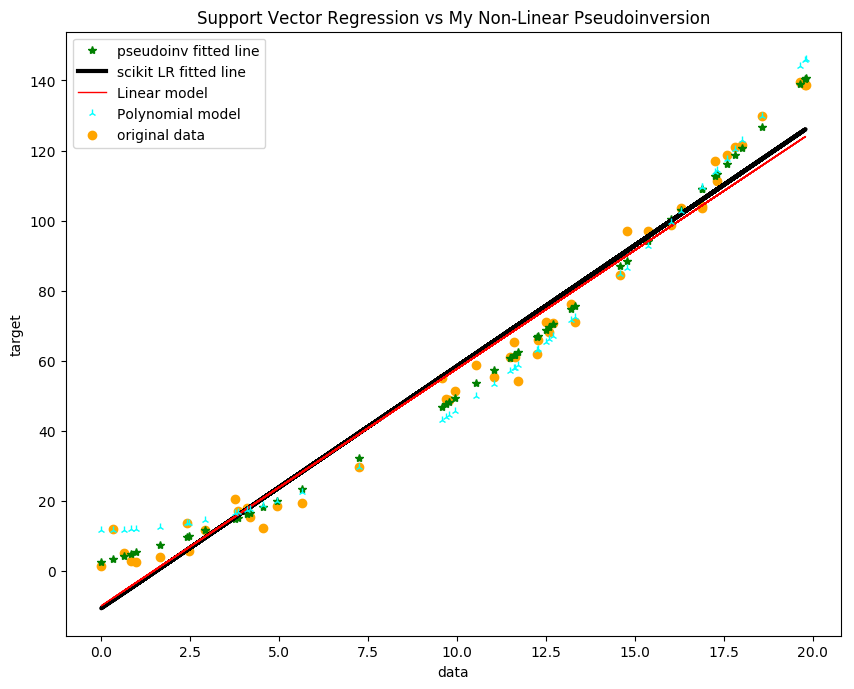

In [4]:
### Verification

# scikit-learn Linear Regression
print("\nscikit-learn Linear Regression")
reg = linear_model.LinearRegression()
reg.fit(x.reshape(-1, 1), y)
y_pred = reg.predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color='black', linestyle='-', linewidth=3.0, label = 'scikit LR fitted line')
print("intercept, slope:", reg.intercept_, reg.coef_)
print("R-squared:", r2_score(y, y_pred))    # 0.96

# Support Vector Regression (SVR) using linear and non-linear kernels
print("\nSupport Vector Regression (SVR) using linear and non-linear kernels:")

# Linear model
print("\nLinear model")
clf = SVR(kernel='linear', C=1e3)
y_pred = clf.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color='red', linewidth=1.0, label = 'Linear model')
print("intercept, slope:", clf.intercept_, clf.coef_)
print("R-squared:", r2_score(y, y_pred))    # 0.96

# Polynomial model
print("\nPolynomial model")
clf = SVR(kernel='poly', C=10, degree=2)
y_pred = clf.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color='cyan', linestyle='', marker='2', label = 'Polynomial model')
print("R-squared:", r2_score(y, y_pred))    # 0.98

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression vs My Non-Linear Pseudoinversion')
plt.legend()
plt.show()


RBF model
R-squared: 0.99428773409


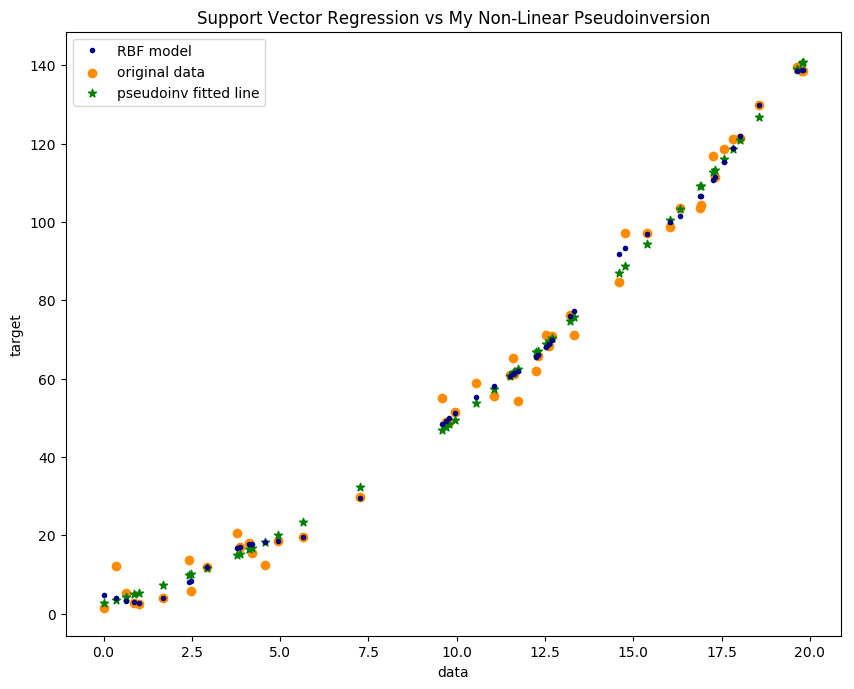

In [5]:
plt.figure(2, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(x, y, color='darkorange', label='original data')
plt.scatter(x, y_hat, color='green', marker='*', label='pseudoinv fitted line')

# RBF model
print("\nRBF model")
clf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_pred = clf.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color='navy', linestyle='', marker='.', label = 'RBF model')
print("R-squared:", r2_score(y, y_pred))    # 0.99

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression vs My Non-Linear Pseudoinversion')
plt.legend()

plt.show()


Multi-layer Perceptron regressor
R-squared: 0.99269479931


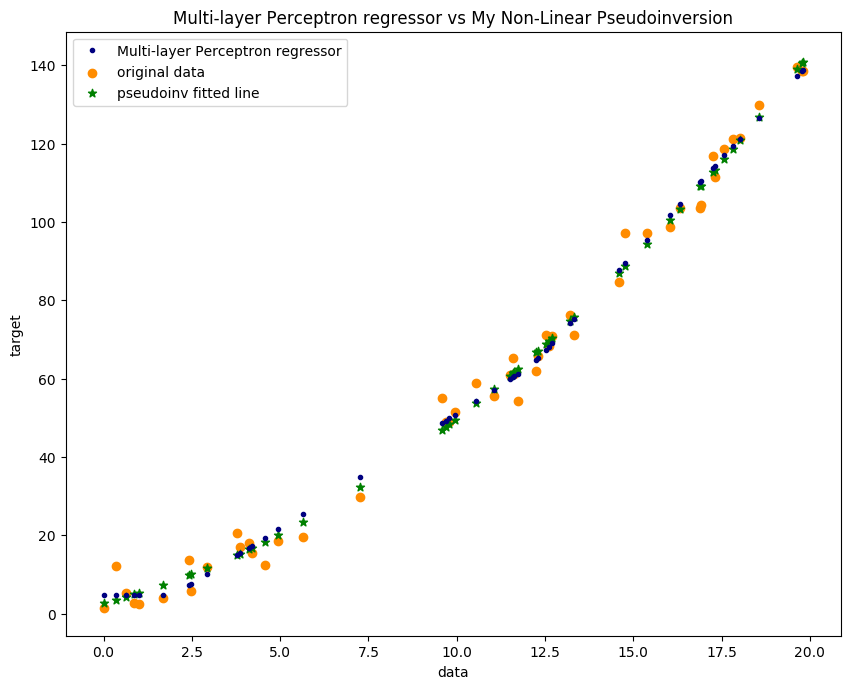

In [8]:
plt.figure(3, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(x, y, color='darkorange', label='original data')
plt.scatter(x, y_hat, color='green', marker='*', label='pseudoinv fitted line')

# Multi-layer Perceptron regressor works better with features centered around zero, with standard deviation of 1.
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
x_scaled = x.copy().reshape(-1, 1)
scaler.fit(x_scaled)
x_scaled = scaler.transform(x_scaled)

# Multi-layer Perceptron regressor
print("\nMulti-layer Perceptron regressor")
clf = MLPRegressor(hidden_layer_sizes=(5, 2), max_iter=1000, solver='lbfgs')
y_pred = clf.fit(x_scaled, y).predict(x_scaled)
plt.plot(x, y_pred, color='navy', linestyle='', marker='.', label = 'Multi-layer Perceptron regressor')
print("R-squared:", r2_score(y, y_pred))    # 0.99

plt.xlabel('data')
plt.ylabel('target')
plt.title('Multi-layer Perceptron regressor vs My Non-Linear Pseudoinversion')
plt.legend()

plt.show()